# Clustering for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from definitions import *
from utils import *

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 's_MAIN_ID', 's_class','s_simbad', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevtev_simbadclasses_normalized_WITHOUTLOG.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins + path_to_catalog, sep='\t')
print(path_to_gamma_bins +path_to_catalog)
spectra.head()

/home/masha/PycharmProjects/gamma-bins/markeddata/gevtev_simbadclasses_normalized_WITHOUTLOG.txt


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_MAIN_ID,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked
0,0.036762,0.321829,0.117302,0.270895,0.222856,0.0,0.003648,0.005523,0.003093,0.004201,...,[],[],0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",119.580254,10.203682,0
1,0.055155,0.201477,0.000004,0.235066,0.028249,0.0,0.391619,0.072840,0.013193,0.002028,...,[],[],0,b' ',b'bll ',b'',b'hbl',74.632011,-78.086937,0
2,0.069119,0.073172,0.003407,0.038325,0.145616,0.0,0.134072,0.020429,0.006452,0.059379,...,[],[],0,b' ',b'snr ',b'',b'snr',120.092361,1.412930,0
3,0.358190,0.178179,0.096737,0.268908,0.097987,0.0,0.000000,0.000000,0.000000,0.000000,...,[],[],0,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',94.174644,-81.216103,0
4,0.269005,0.157462,0.139724,0.220561,0.213247,0.0,0.000000,0.000000,0.000000,0.000000,...,[],[],0,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',120.975426,-2.978120,0


In [5]:
spectra = spectra.copy()
spectra = spectra.reset_index(drop=True)

In [6]:
spectrum_columns = list_gev_spectrum_columns() + list_tev_spectrum_columns()

In [7]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

In [8]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

In [9]:
colors = list(colors.values())[21:]

* ### earth mover's distance

In [10]:
# earth mover's distance
metric_function = st.wasserstein_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function, n_jobs=6)
# spectra_distances = get_distance_metric(metric_function).pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

In [11]:
from utils import *

Clustering


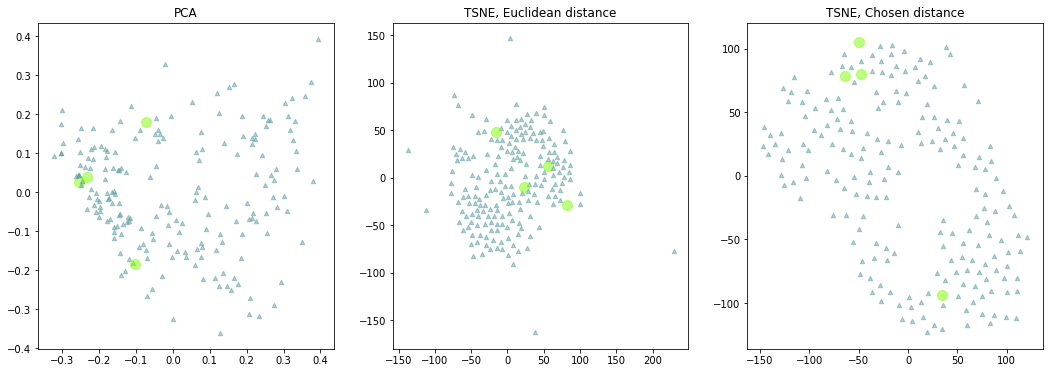

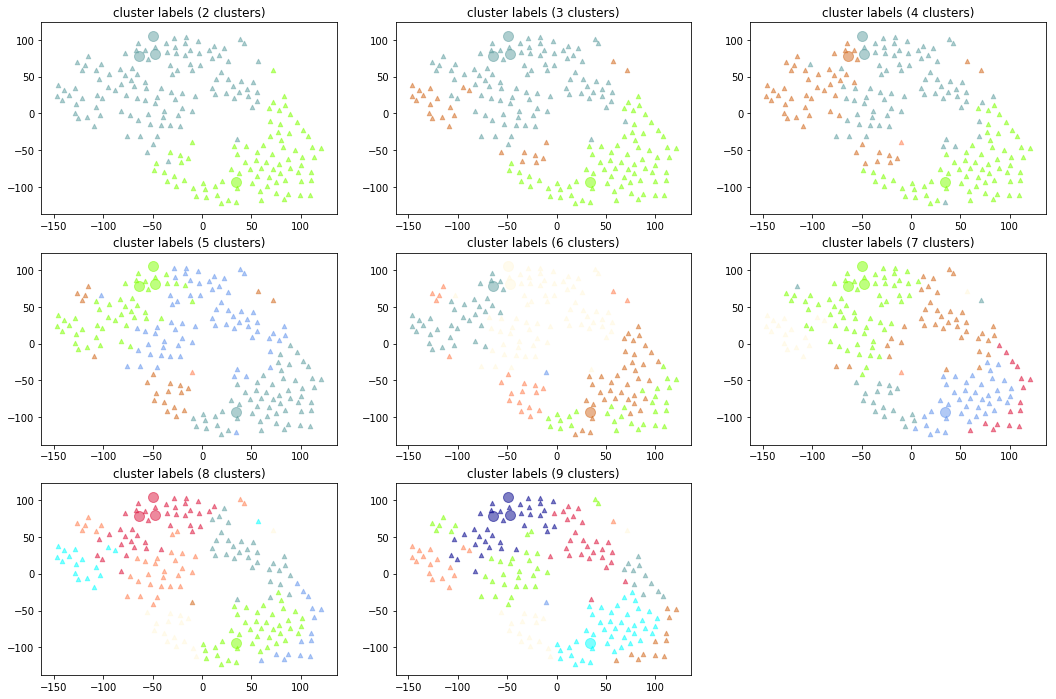

In [12]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=700, TSNE_n_iter=340, TSNE_learning_rate2= 800)

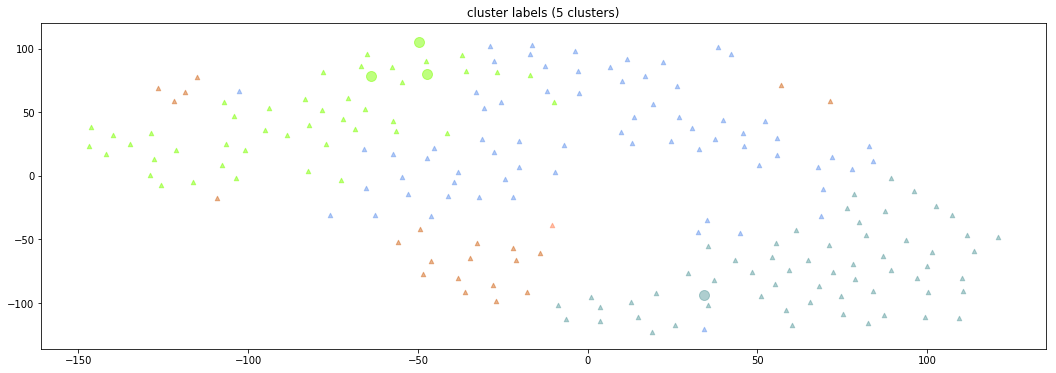

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_5
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,1
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,1
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,0
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,1


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
22,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
26,b' ',b'PWN ',b'',b'pwn',[],[],0,0
30,b' ',b' ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
34,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
35,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
36,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
38,b' ',b'PWN ',b'',b'pwn',[],[],0,0
41,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0
44,b' ',b'bcu ',b'',b'hbl',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
13,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
24,b' ',b'PWN ',b'',b'psr',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
28,b' ',b'bll ',b'',b'hbl',[],[],0,0
31,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
40,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',[],[],0,0
43,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',[],[],0,0
47,b' ',b'PSR ',b'',b'pwn',[],[],0,0


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b' ',b'snr ',b'',b'snr',[],[],0,0
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
21,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
23,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
46,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
57,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
64,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
72,b'1FGL J1325.6-4300 ',b'RDG ',b'',b'fri',[],[],0,0
73,b' ',b'PSR ',b'',b'pwn',[],[],0,0


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
86,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0


4 cluster (#6495ED)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
14,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.118615,0.125327,0.117417,0.112892,0.124463,0.0,0.147292,0.095638,0.068766,0.046142,0.043449
1,0.054127,0.258892,0.228767,0.137432,0.302342,0.0,0.008871,0.003952,0.002687,0.001601,0.001328
2,0.104660,0.109431,0.186770,0.098425,0.127961,0.0,0.131067,0.042744,0.029012,0.038678,0.131252
3,0.000057,0.000393,0.000838,0.000202,0.000636,0.0,0.000009,0.000187,0.002927,0.059691,0.935061
4,0.098843,0.206145,0.194450,0.161293,0.216811,0.0,0.060707,0.024050,0.016358,0.011657,0.009687


In [13]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 5, colors,spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

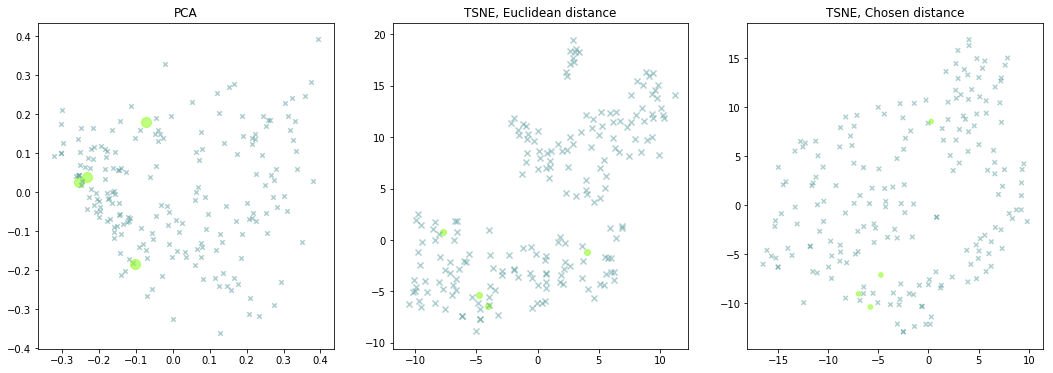

Clustering


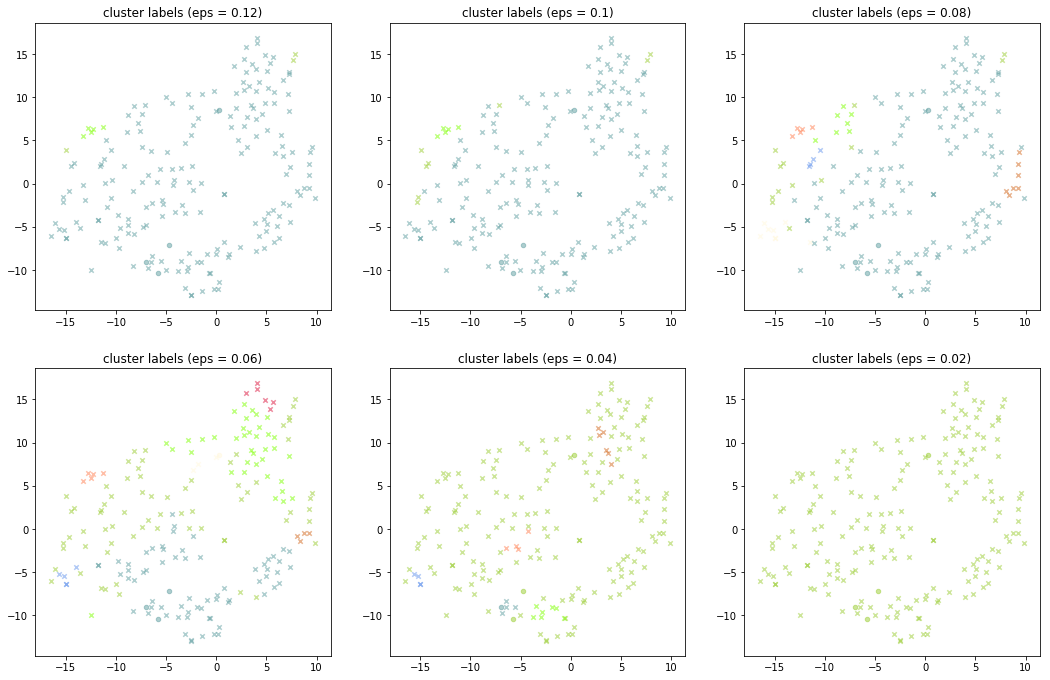

In [14]:
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

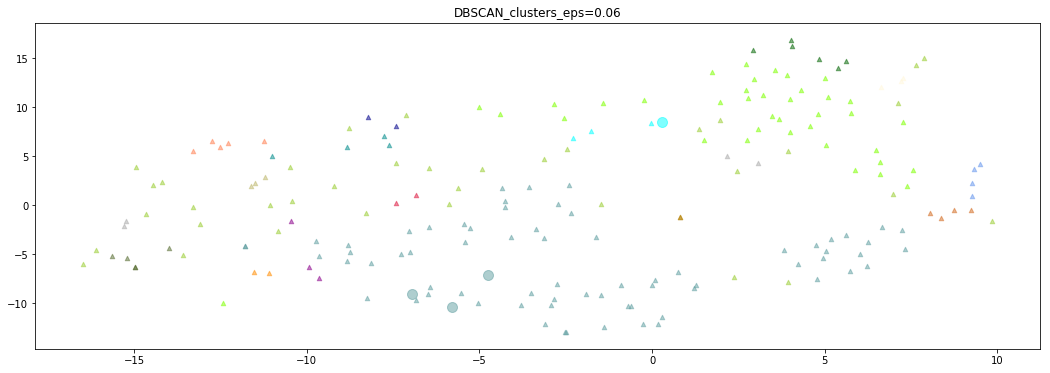

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.06
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,0
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,7
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
13,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
16,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
17,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
26,b' ',b'PWN ',b'',b'pwn',[],[],0,0
30,b' ',b' ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
36,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
44,b' ',b'bcu ',b'',b'hbl',[],[],0,0
45,b' ',b'bll ',b'',b'hbl',[],[],0,0
51,b' ',b'PSR ',b'',b'unid',[],[],0,0
58,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',[],[],0,0
69,b' ',b'PWN ',b'',b'pwn',[],[],0,0
70,b' ',b'bcu ',b'',b'hbl',[],[],0,0


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
14,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
181,b'1FGL J2001.1+4351 ',b'bll ',b'',b'ibl',[],[],0,0


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
23,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
46,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
57,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
90,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


4 cluster (#6495ED)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
22,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
35,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
62,b'1FGL J1217.7+3007 ',b'bll ',b'',b'hbl',[],[],0,0
195,b'1FGL J2250.1+3825 ',b'bll ',b'',b'hbl',[],[],0,0


5 cluster (#FFF8DC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
38,b' ',b'PWN ',b'',b'pwn',[],[],0,0
56,b' ',b' ',b'',b'pwn',[],[],0,0
104,b'1FGL J1653.9+3945 ',b'BLL ',b'',b'hbl',[],[],0,0


6 cluster (#DC143C)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
52,b'1FGL J1023.0-5746 ',b'PSR ',b'',b'unid',[],[],0,0
110,b'1FGL J1718.2-3825 ',b'PSR ',b'',b'pwn',[],[],0,0


7 cluster (#00FFFF)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
60,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',[],[],0,0
145,b' ',b'spp ',b'',b'unid',[],[],0,0
152,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',"[""b'V* V479 Sct'""]",['B0Ve'],1,1
167,b'1FGL J1849.7-0121c',b' ',b'',b'unid',[],[],0,0


8 cluster (#00008B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
64,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
198,b'1FGL J2359.0-3035 ',b'bll ',b'',b'hbl',[],[],0,0


9 cluster (#008B8B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
73,b' ',b'PSR ',b'',b'pwn',[],[],0,0
87,b'1FGL J1513.2-5904 ',b'PSR ',b'',b'pwn',[],[],0,0
101,b' ',b'spp ',b'',b'pwn',[],[],0,0
178,b' ',b' ',b'',"b'pwn,snr'","[""b'[KKM2013] 7'""]",['B'],1,0


10 cluster (#B8860B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
75,b'1FGL J1420.1-6048 ',b'PSR ',b'',b'pwn',[],[],0,0
77,b'1FGL J1420.1-6048 ',b'PSR ',b'',b'pwn',[],[],0,0


11 cluster (#A9A9A9)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
82,b' ',b' ',b'',b'pwn',[],[],0,0
164,b'1FGL J1844.2-0342c',b' ',b'',b'unid',[],[],0,0


12 cluster (#006400)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
91,b'1FGL J1614.7-5138c',b'spp ',b'',b'unid',"[""b'MSX6C G331.5487-00.5364'"" ""b'MSX6C G331.54...",['Be' 'B'],1,0
100,b'1FGL J1640.8-4634c',b'spp ',b'',b'pwn',[],[],0,0
156,b'1FGL J1834.3-0842c',b'snr ',b'',b'unid',[],[],0,0
159,b' ',b' ',b'',b'pwn',[],[],0,0
161,b' ',b' ',b'',b'unid',"[""b'LS IV -05 11'"" ""b'[KRL2007b] 332'""]",['B' 'B0Ve'],1,0
162,b' ',b'PWN ',b'',b'unid',"[""b'LS IV -05 11'"" ""b'[KRL2007b] 332'""]",['B' 'B0Ve'],1,0


13 cluster (#A9A9A9)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
114,b' ',b' ',b'',"b'unid,snr,mc'",[],[],0,0
134,b' ',b' ',b'',"b'snr,mc'",[],[],0,0


14 cluster (#BDB76B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
118,b'1FGL J1745.6-2900c',b'spp ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
122,b'1FGL J1745.6-2900c',b'spp ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
127,b'1FGL J1745.6-2900c',b'spp ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0


15 cluster (#8B008B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
119,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
149,b' ',b'spp ',b'',"b'pwn,snr'",[],[],0,0
155,b'1FGL J1833.5-1034 ',b'PSR ',b'',b'pwn',[],[],0,0


16 cluster (#556B2F)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
121,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
126,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0
163,b' ',b' ',b'',b'unid',[],[],0,0
165,b' ',b' ',b'',b'unid',[],[],0,0
170,b'1FGL J1853.1+0032c',b'psr ',b'',b'unid',[],[],0,0


17 cluster (#FF8C00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
123,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
128,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0


18 cluster (#9932CC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b' ',b'snr ',b'',b'snr',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
19,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
20,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
21,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
24,b' ',b'PWN ',b'',b'psr',[],[],0,0
27,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
28,b' ',b'bll ',b'',b'hbl',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.070119,0.228850,0.229163,0.147218,0.257630,0.0,0.028221,0.013627,0.010179,0.008367,0.006625
1,0.124544,0.125015,0.111467,0.116813,0.121907,0.0,0.155000,0.087114,0.062681,0.043324,0.052135
2,0.203026,0.206596,0.158582,0.229700,0.187130,0.0,0.013142,0.001384,0.000340,0.000080,0.000022
3,0.169085,0.051186,0.011159,0.065171,0.039534,0.0,0.059296,0.024707,0.034945,0.113516,0.431401
4,0.161416,0.179780,0.185817,0.179278,0.161780,0.0,0.112531,0.016246,0.002633,0.000426,0.000092
5,0.128069,0.122590,0.116920,0.098195,0.165255,0.0,0.022114,0.074230,0.100552,0.104724,0.067352
6,0.007119,0.322191,0.013951,0.123654,0.352134,0.0,0.094766,0.035936,0.022851,0.025231,0.002167
7,0.060545,0.115969,0.179591,0.073328,0.116540,0.0,0.202599,0.118790,0.077362,0.034143,0.021132
8,0.055762,0.087856,0.115652,0.075743,0.084847,0.0,0.423710,0.099316,0.048256,0.007290,0.001569
9,0.027444,0.078307,0.264914,0.043800,0.207900,0.0,0.216214,0.080220,0.046106,0.024372,0.010722


In [15]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.06, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [16]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.14346802126727987)

* ### euclidean distance

In [17]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [18]:
spectra_distances.min(), spectra_distances.max()

(0.0, 1.13132861505431)

Clustering


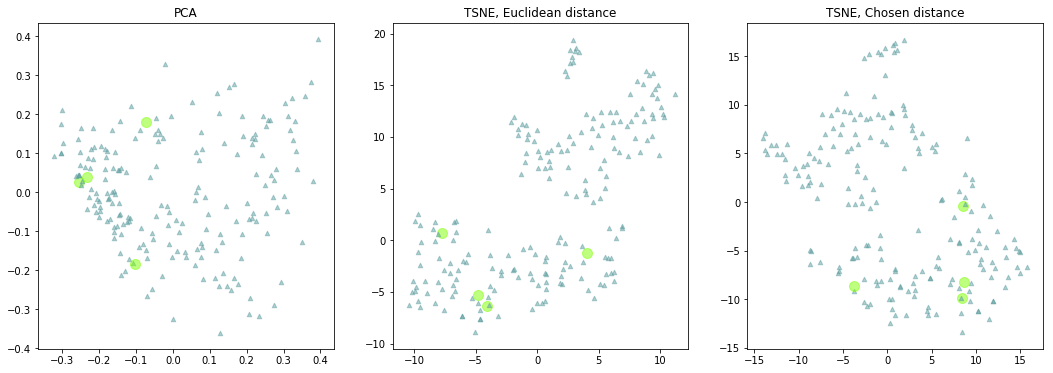

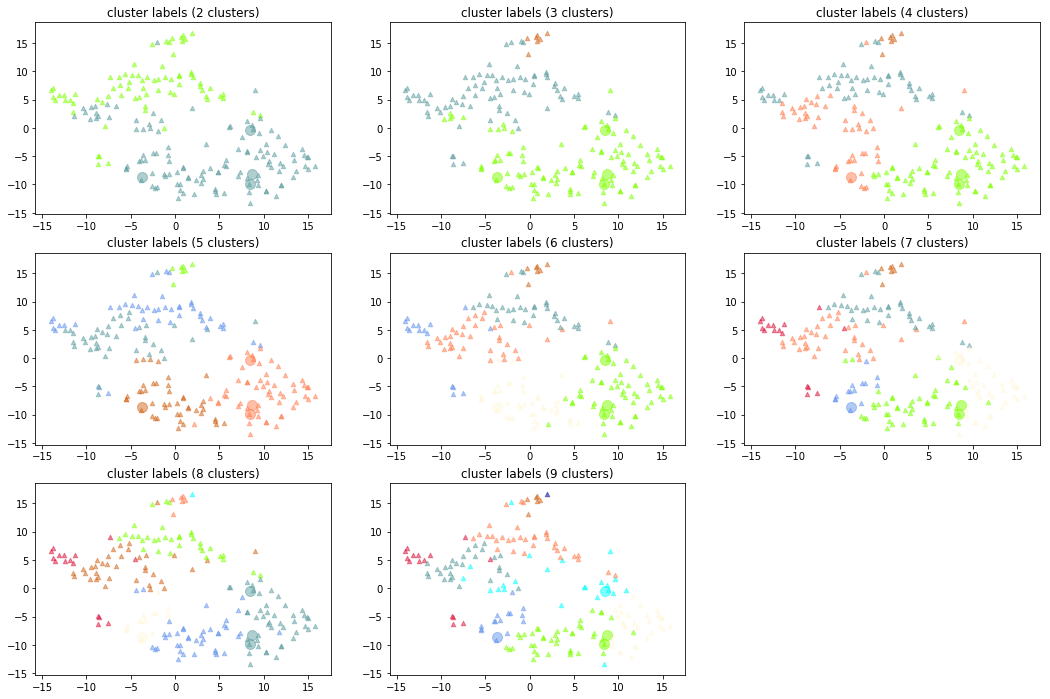

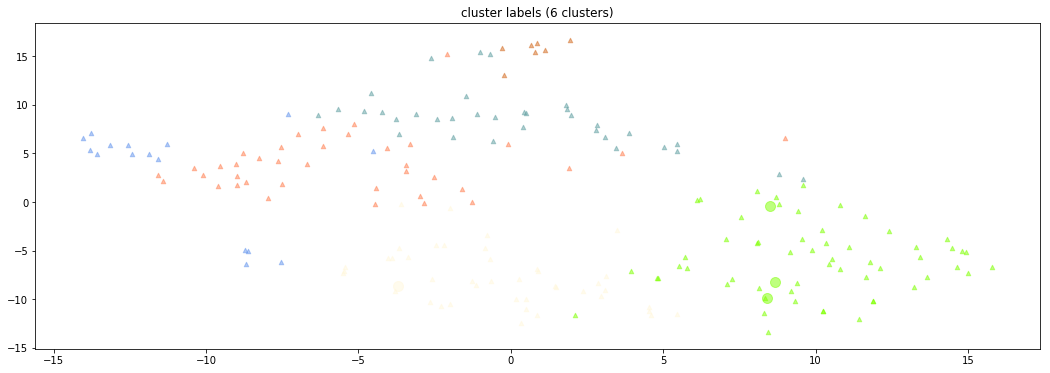

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_6
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,1
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,1
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,1
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,5


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
19,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
26,b' ',b'PWN ',b'',b'pwn',[],[],0,0
32,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',[],[],0,0
34,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
41,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0
44,b' ',b'bcu ',b'',b'hbl',[],[],0,0
45,b' ',b'bll ',b'',b'hbl',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
13,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
27,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
38,b' ',b'PWN ',b'',b'pwn',[],[],0,0
43,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',[],[],0,0
47,b' ',b'PSR ',b'',b'pwn',[],[],0,0
48,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',[],[],0,1


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b' ',b'snr ',b'',b'snr',[],[],0,0
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
37,b' ',b' ',b'',b'pwn',[],[],0,0
46,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
57,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
86,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0
90,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
14,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
20,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
22,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
30,b' ',b' ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
35,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
36,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
51,b' ',b'PSR ',b'',b'unid',[],[],0,0


4 cluster (#6495ED)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
17,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
21,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
23,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
24,b' ',b'PWN ',b'',b'psr',[],[],0,0
28,b' ',b'bll ',b'',b'hbl',[],[],0,0
33,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',[],[],0,0
40,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',[],[],0,0


5 cluster (#FFF8DC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
16,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
29,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
31,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
39,b'1FGL J0835.3-4510 ',b'PSR ',b'',b'pwn',[],[],0,0
42,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
52,b'1FGL J1023.0-5746 ',b'PSR ',b'',b'unid',[],[],0,0
55,b'1FGL J1028.4-5819 ',b'PSR ',b'',b'pwn',[],[],0,0
67,b'1FGL J1230.8+1223 ',b'rdg ',b'',b'fri',[],[],0,0
74,b'1FGL J1418.7-6057 ',b'PSR ',b'',b'pwn',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.103586,0.081442,0.087685,0.085513,0.074568,0.0,0.261183,0.119745,0.082199,0.052512,0.051567
1,0.024475,0.175874,0.347423,0.089107,0.265176,0.0,0.035597,0.025559,0.017452,0.010156,0.009181
2,0.056900,0.030230,0.008574,0.038791,0.035460,0.0,0.057907,0.035271,0.056092,0.137581,0.543193
3,0.174821,0.169808,0.114094,0.185604,0.155138,0.0,0.089213,0.045373,0.029756,0.019304,0.016890
4,0.338337,0.208011,0.041032,0.254254,0.079232,0.0,0.026093,0.015514,0.014923,0.012520,0.010083
5,0.030418,0.300612,0.141985,0.159418,0.312098,0.0,0.023064,0.015247,0.009025,0.005344,0.002789


In [19]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

[1.2000000000000002, 1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


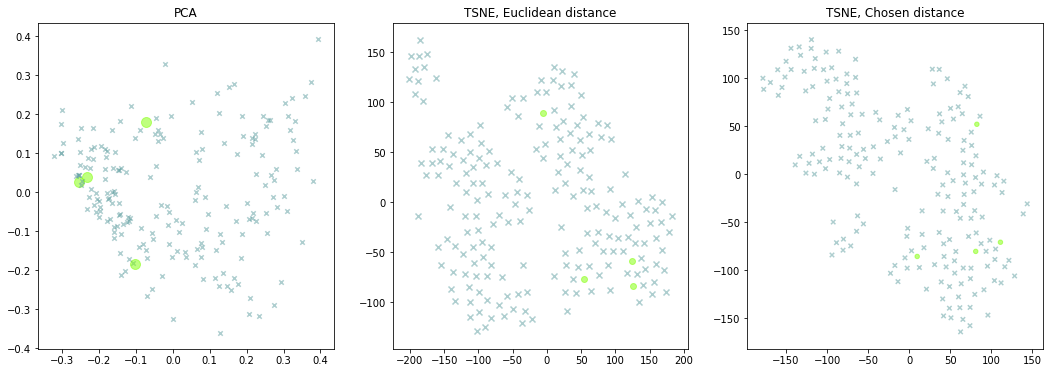

Clustering


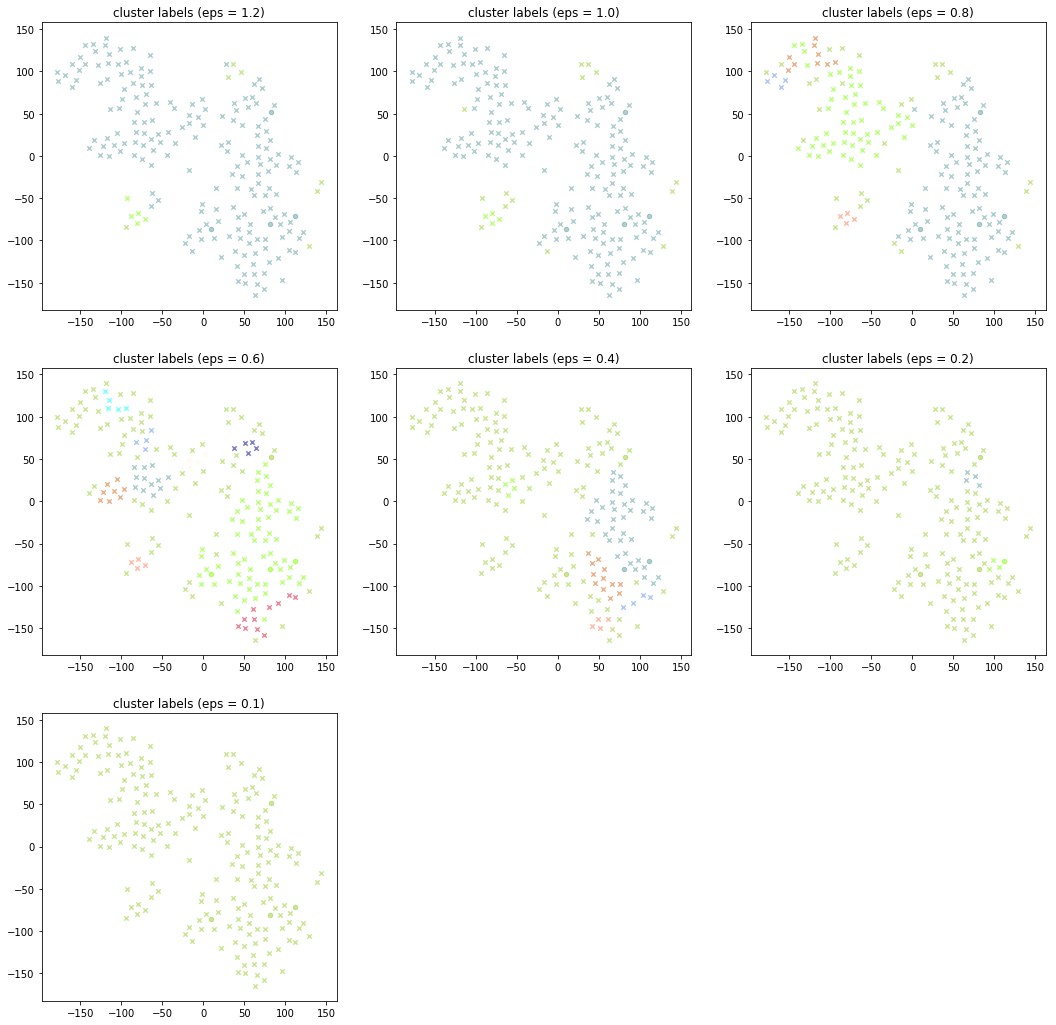

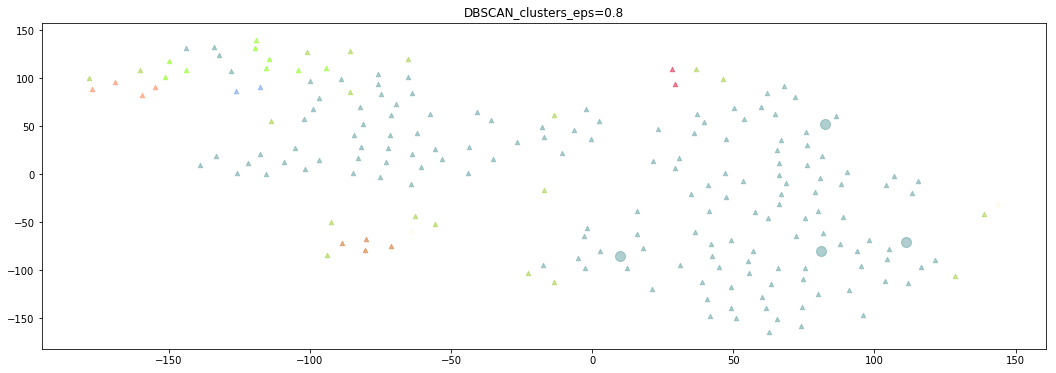

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.8
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,0
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,0
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
64,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
88,b'1FGL J1514.7-5917 ',b'PWN ',b'',b'pwn',[],[],0,0
106,b'1FGL J1711.7-3944c',b'SNR ',b'',b'snr',[],[],0,0
145,b' ',b'spp ',b'',b'unid',[],[],0,0
151,b'1FGL J1825.7-1410c',b'PWN ',b'',b'pwn',[],[],0,0
153,b' ',b' ',b'',b'bin',"[""b'V* V479 Sct'""]",['B0Ve'],1,0
186,b'1FGL J2020.0+4049 ',b'SNR ',b'',b'unid',[],[],0,0
198,b'1FGL J2359.0-3035 ',b'bll ',b'',b'hbl',[],[],0,0


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
46,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
57,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
90,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
30,b' ',b' ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
93,b'1FGL J1626.0-4917c',b' ',b'',b'unid',[],[],0,0
95,b' ',b'psr ',b'',b'pwn',"[""b'2FHL J1633.5-4746e'""]",['B0Ve'],2,0
190,b'1FGL J2202.8+4216 ',b'BLL ',b'',b'lbl',[],[],0,0


4 cluster (#6495ED)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
41,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0
81,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',[],[],0,0


5 cluster (#FFF8DC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
44,b' ',b'bcu ',b'',b'hbl',[],[],0,0
147,b' ',b' ',b'',b'pwn',[],[],0,0


6 cluster (#DC143C)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
132,b' ',b' ',b'',b'pwn',[],[],0,0
135,b' ',b' ',b'',"b'snr,mc'",[],[],0,0


7 cluster (#00FFFF)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
17,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
37,b' ',b' ',b'',b'pwn',[],[],0,0
45,b' ',b'bll ',b'',b'hbl',[],[],0,0
51,b' ',b'PSR ',b'',b'unid',[],[],0,0
53,b' ',b' ',b'',b'unid',[],[],0,0
69,b' ',b'PWN ',b'',b'pwn',[],[],0,0
73,b' ',b'PSR ',b'',b'pwn',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.096800,0.202966,0.201736,0.142287,0.230750,0.0,0.054834,0.030857,0.019617,0.011705,0.008448
1,0.104847,0.058951,0.038054,0.072860,0.048621,0.0,0.327157,0.158557,0.108244,0.057644,0.025066
2,0.080226,0.033446,0.013939,0.052557,0.025492,0.0,0.066585,0.021803,0.032917,0.136241,0.536796
3,0.035599,0.103785,0.220706,0.075500,0.100144,0.0,0.300787,0.083856,0.042344,0.022132,0.015149
4,0.071402,0.077261,0.112681,0.086041,0.110092,0.0,0.127479,0.153100,0.137800,0.082900,0.041244
5,0.022708,0.092925,0.037634,0.069054,0.135333,0.0,0.091854,0.049511,0.063591,0.083762,0.353628
6,0.097176,0.343373,0.021645,0.320597,0.044305,0.0,0.059732,0.037907,0.024245,0.020216,0.030805
7,0.094246,0.128628,0.107056,0.112216,0.094475,0.0,0.140806,0.070007,0.063325,0.061468,0.127773


In [20]:
eps_l = [0.1 * i for i in range(12, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.8, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

* ### cosine distance

In [21]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


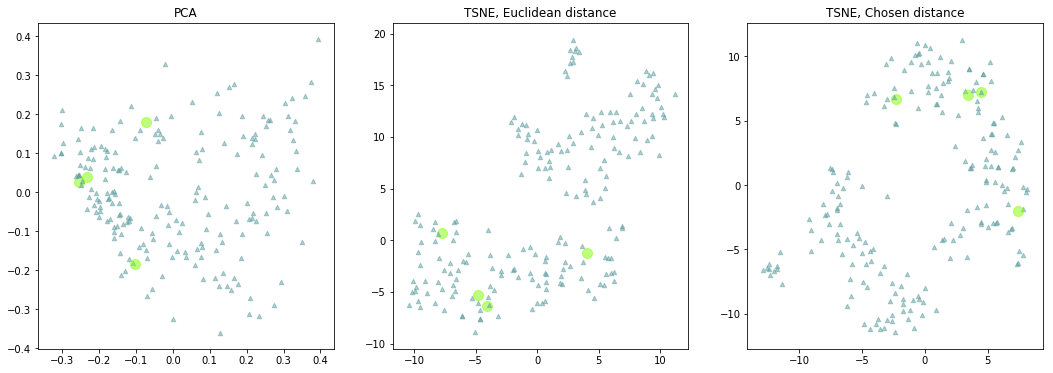

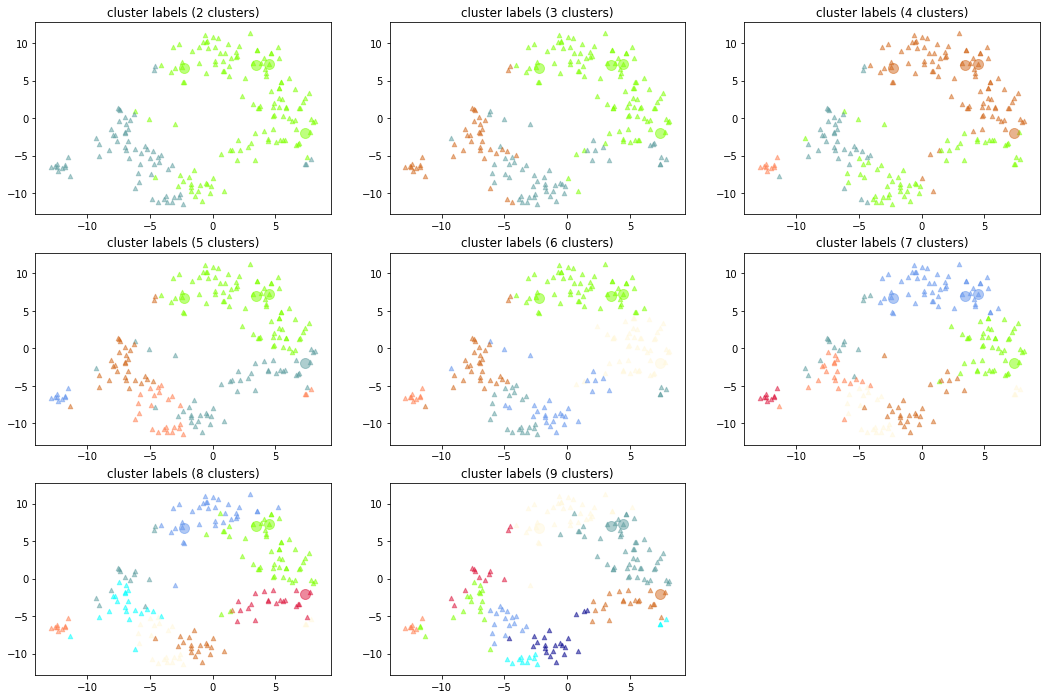

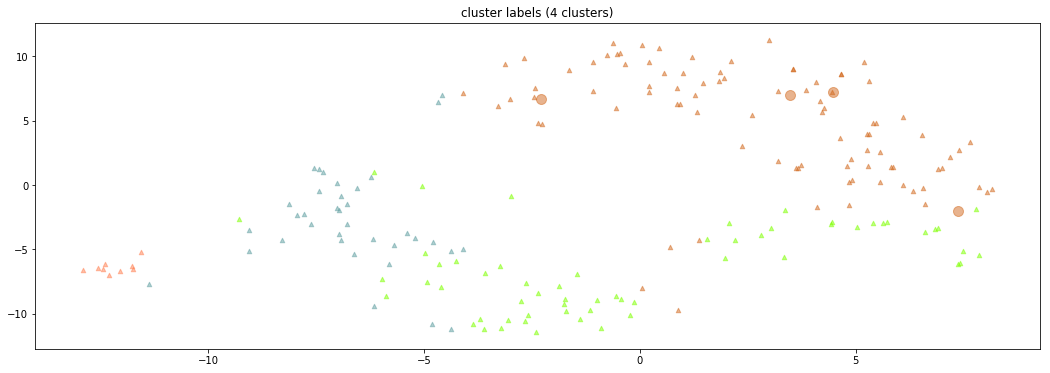

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_4
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,2
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,2
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,2
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,2


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
17,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
19,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
21,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
23,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
26,b' ',b'PWN ',b'',b'pwn',[],[],0,0
32,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',[],[],0,0
34,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
14,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
20,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
22,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
13,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
16,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
27,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
29,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
31,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
35,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b' ',b'snr ',b'',b'snr',[],[],0,0
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
37,b' ',b' ',b'',b'pwn',[],[],0,0
44,b' ',b'bcu ',b'',b'hbl',[],[],0,0
46,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
57,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
86,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0
90,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0
147,b' ',b' ',b'',b'pwn',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.146601,0.083205,0.081945,0.092796,0.069881,0.0,0.249849,0.115131,0.079385,0.049382,0.031826
1,0.171892,0.221398,0.077535,0.202395,0.175207,0.0,0.065531,0.035549,0.023250,0.014787,0.012455
2,0.030682,0.210114,0.291281,0.114725,0.275480,0.0,0.029541,0.020182,0.013264,0.007903,0.006827
3,0.049302,0.044162,0.015032,0.045516,0.057654,0.0,0.065451,0.038435,0.057758,0.125621,0.501068


In [22]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

<Figure size 432x288 with 0 Axes>

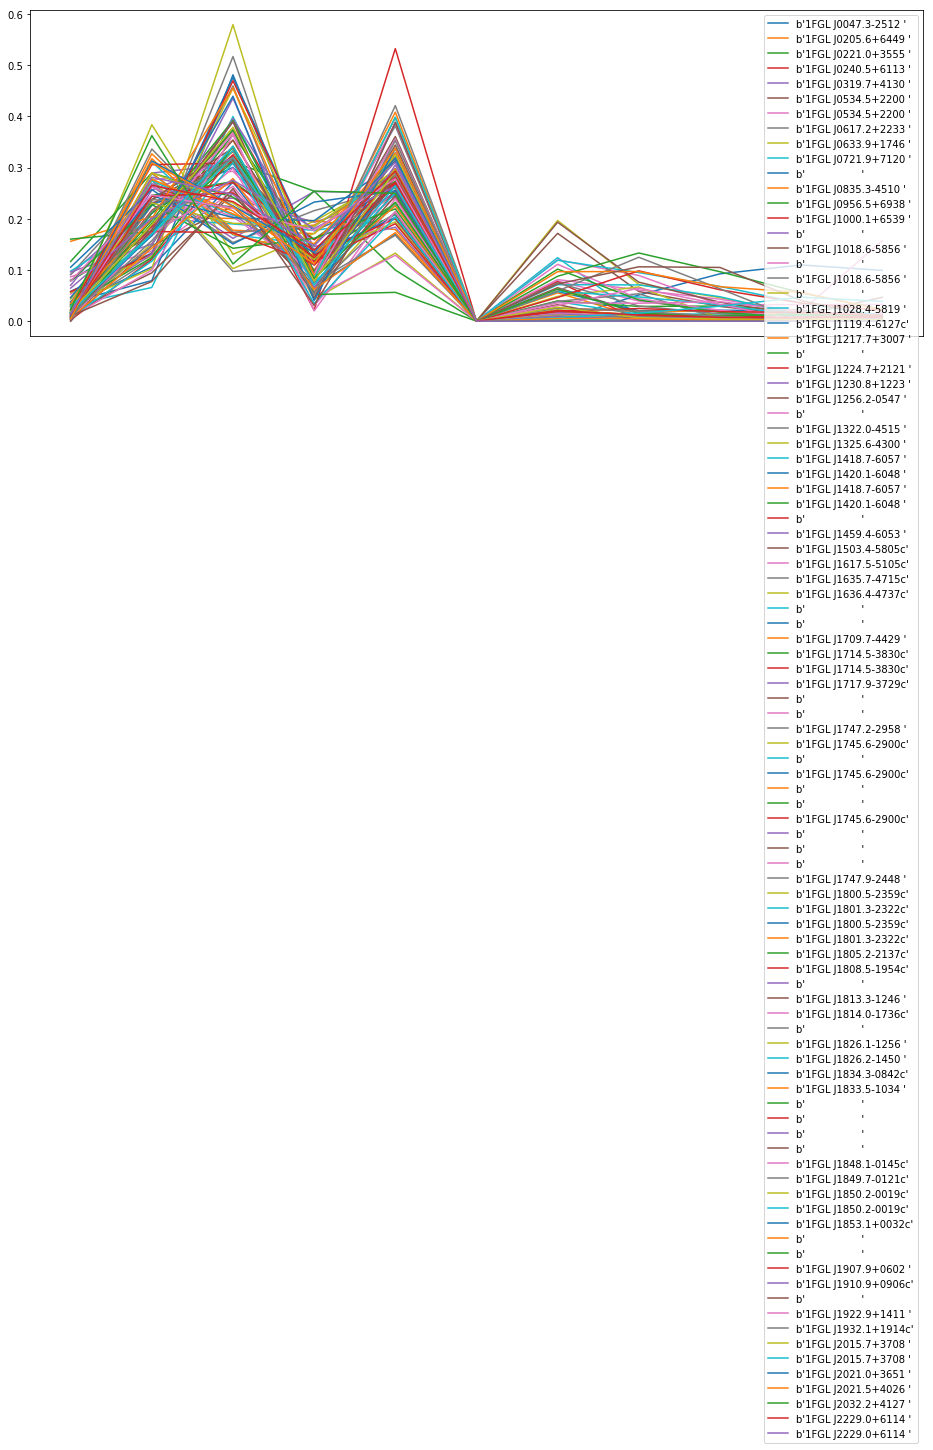

In [23]:
marked_cluster = list_spectra_clusters[2]
show_all_spectra(spectrum_columns, spectra.iloc[list(marked_cluster.index)])

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


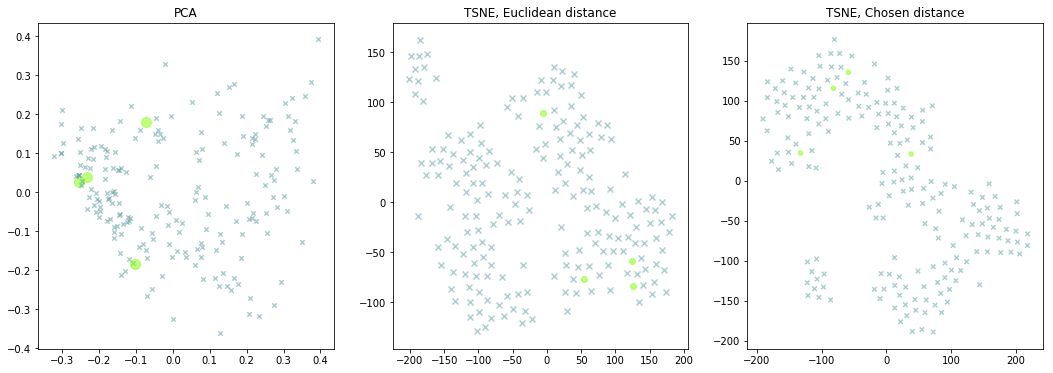

Clustering


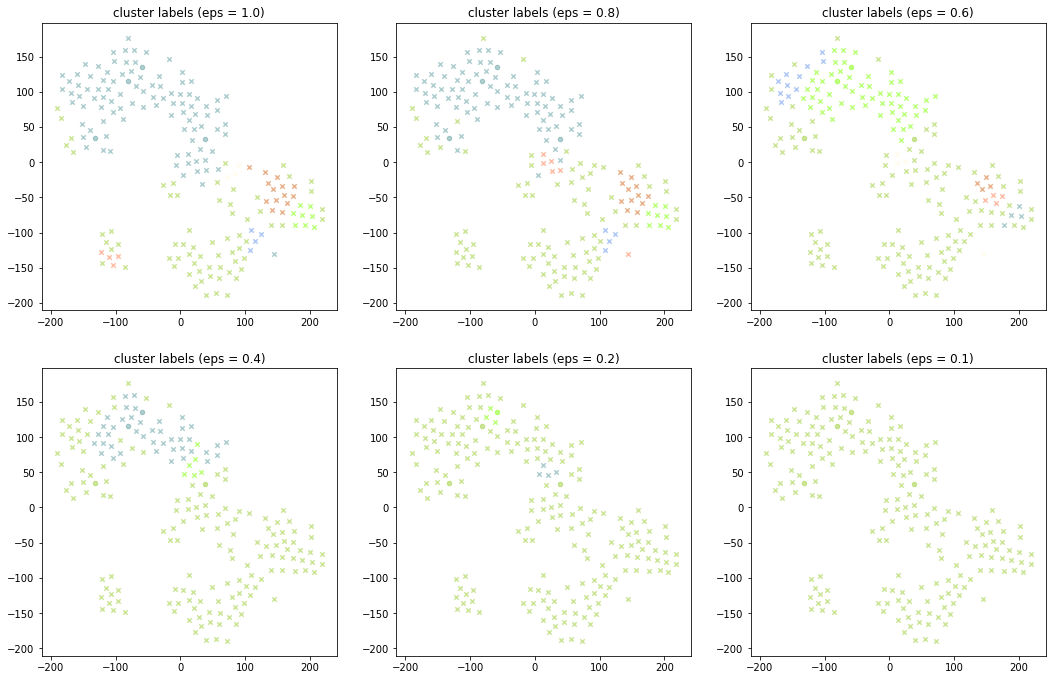

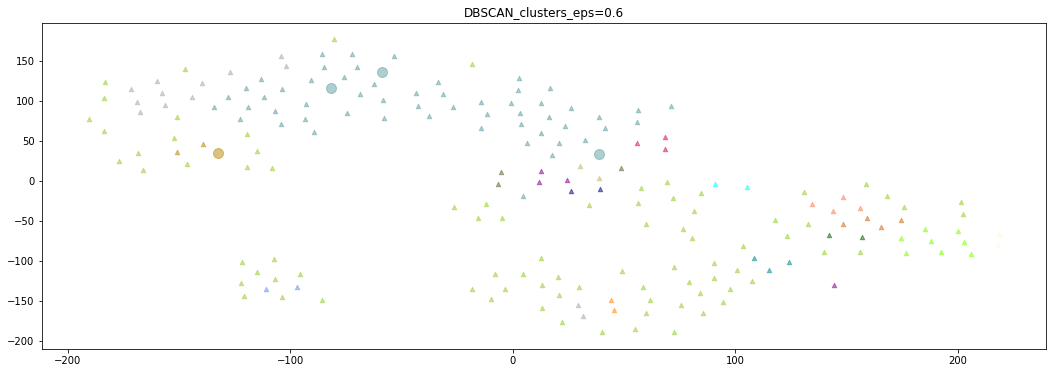

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.6
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,0
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,10
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
13,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
16,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
27,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
31,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
39,b'1FGL J0835.3-4510 ',b'PSR ',b'',b'pwn',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
24,b' ',b'PWN ',b'',b'psr',[],[],0,0
28,b' ',b'bll ',b'',b'hbl',[],[],0,0
33,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',[],[],0,0
40,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',[],[],0,0
63,b'1FGL J1221.3+3008 ',b'bll ',b'',b'hbl',[],[],0,0
194,b'1FGL J2244.0+2021 ',b'bll ',b'',b'ibl',[],[],0,0


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
20,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
36,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
180,b'1FGL J2000.0+6508 ',b'bll ',b'',b'hbl',[],[],0,0


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
14,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
181,b'1FGL J2001.1+4351 ',b'bll ',b'',b'ibl',[],[],0,0


4 cluster (#6495ED)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
57,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0


5 cluster (#FFF8DC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
21,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
23,b' ',b' ',b'',"b'snr,mc'",[],[],0,0


6 cluster (#DC143C)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
29,b'1FGL J0617.2+2233 ',b'SNR ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
67,b'1FGL J1230.8+1223 ',b'rdg ',b'',b'fri',[],[],0,0
154,b'1FGL J1834.3-0842c',b'snr ',b'',b'unid',[],[],0,0


7 cluster (#00FFFF)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
35,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
141,b'1FGL J1805.2-2137c',b'SNR ',b'',b'unid',[],[],0,0


8 cluster (#00008B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
52,b'1FGL J1023.0-5746 ',b'PSR ',b'',b'unid',[],[],0,0
110,b'1FGL J1718.2-3825 ',b'PSR ',b'',b'pwn',[],[],0,0


9 cluster (#008B8B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
58,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',[],[],0,0
113,b'1FGL J1744.2+1934 ',b'bll ',b'',b'hbl',[],[],0,0
182,b'1FGL J2009.5-4849 ',b'BLL ',b'',b'hbl',[],[],0,0


10 cluster (#B8860B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
70,b' ',b'bcu ',b'',b'hbl',[],[],0,0
152,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',"[""b'V* V479 Sct'""]",['B0Ve'],1,1
171,b' ',b' ',b'',b'unid',[],[],0,0


11 cluster (#A9A9A9)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
71,b'1FGL J1322.0-4515 ',b'RDG ',b'',b'fri',[],[],0,0
97,b'1FGL J1635.7-4715c',b'spp ',b'',b'unid',[],[],0,0
103,b' ',b'spp ',b'',b'unid',[],[],0,0
118,b'1FGL J1745.6-2900c',b'spp ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
122,b'1FGL J1745.6-2900c',b'spp ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
127,b'1FGL J1745.6-2900c',b'spp ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0
143,b' ',b' ',b'',b'unid',[],[],0,0
155,b'1FGL J1833.5-1034 ',b'PSR ',b'',b'pwn',[],[],0,0
163,b' ',b' ',b'',b'unid',[],[],0,0
165,b' ',b' ',b'',b'unid',[],[],0,0


12 cluster (#006400)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
78,b'1FGL J1426.9+2347 ',b'BLL ',b'',b'hbl',[],[],0,0
189,b'1FGL J2158.8-3013 ',b'bll ',b'',b'hbl',[],[],0,0


13 cluster (#A9A9A9)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
94,b' ',b'spp ',b'',b'unid',[],[],0,0
144,b' ',b'spp ',b'',b'unid',[],[],0,0


14 cluster (#BDB76B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
98,b'1FGL J1636.4-4737c',b'snr ',b'',b'unid',[],[],0,0
116,b'1FGL J1747.2-2958 ',b'PSR ',b'',"b'unid,snr,mc'",[],[],0,0


15 cluster (#8B008B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
117,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
121,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
126,b' ',b' ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0
175,b' ',b'PSR ',b'',"b'snr,mc'",[],[],0,0


16 cluster (#556B2F)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
119,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
123,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',"[""b'[MCD2010] 13'""]",['O'],1,0
128,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',"[""b'[MCD2010] 18'"" ""b'[MCD2010] 13'""]",['O'],1,0


17 cluster (#FF8C00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
145,b' ',b'spp ',b'',b'unid',[],[],0,0
153,b' ',b' ',b'',b'bin',"[""b'V* V479 Sct'""]",['B0Ve'],1,0


18 cluster (#9932CC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
17,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
19,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
22,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
26,b' ',b'PWN ',b'',b'pwn',[],[],0,0
30,b' ',b' ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.024143,0.245306,0.268099,0.128168,0.298173,0.0,0.014377,0.007965,0.005961,0.004529,3.279752e-03
1,0.397970,0.159093,0.071110,0.270115,0.101712,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,0.265158,0.179339,0.140637,0.222442,0.163535,0.0,0.026270,0.002376,0.000225,0.000018,1.936288e-06
3,0.203026,0.206596,0.158582,0.229700,0.187130,0.0,0.013142,0.001384,0.000340,0.000080,2.160652e-05
4,0.064437,0.018116,0.003494,0.036678,0.016852,0.0,0.112674,0.032054,0.030295,0.137516,5.478854e-01
5,0.547815,0.108563,0.017778,0.159250,0.095614,0.0,0.015071,0.018160,0.021529,0.011310,4.910690e-03
6,0.088835,0.261703,0.155239,0.233798,0.254974,0.0,0.004625,0.000762,0.000060,0.000004,2.849376e-07
7,0.087830,0.214296,0.166016,0.169494,0.209164,0.0,0.112792,0.025872,0.009031,0.003619,1.886326e-03
8,0.007119,0.322191,0.013951,0.123654,0.352134,0.0,0.094766,0.035936,0.022851,0.025231,2.166833e-03
9,0.229237,0.133279,0.073724,0.198620,0.088075,0.0,0.177550,0.061822,0.024158,0.009051,4.483737e-03


In [24]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

<Figure size 432x288 with 0 Axes>

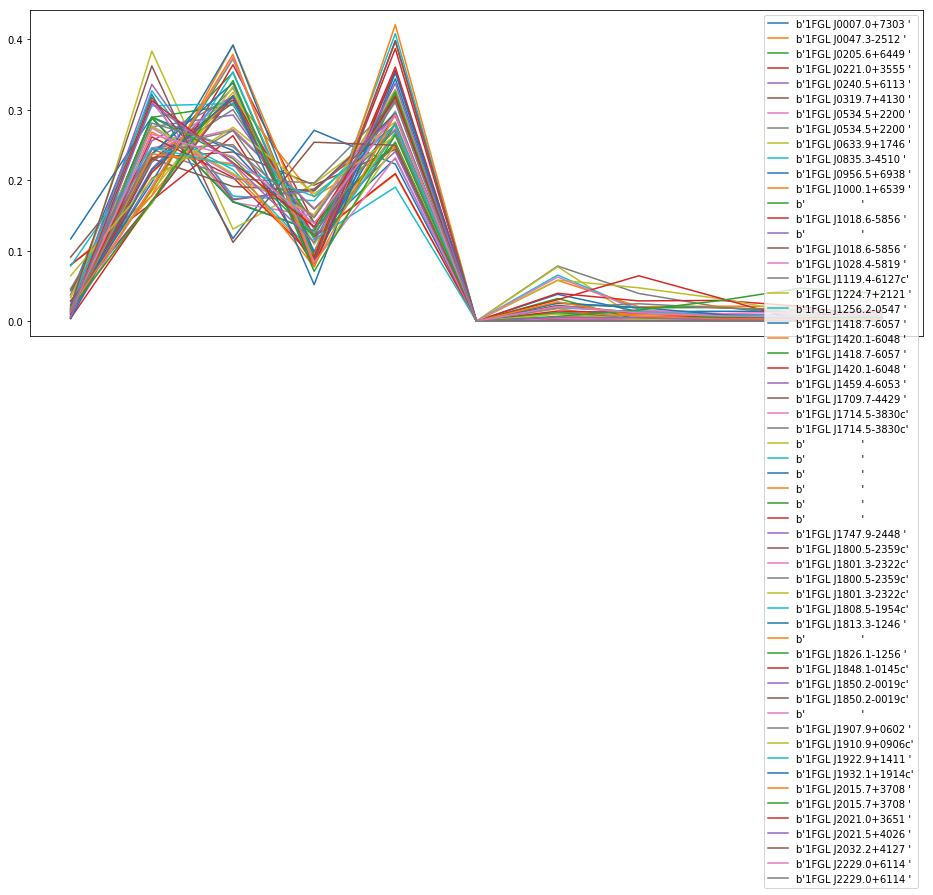

In [25]:
marked_cluster = list_spectra_clusters[0]
show_all_spectra(spectrum_columns, spectra.iloc[list(marked_cluster.index)])

* ### energy distance

In [26]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [27]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.32025841730627447)

Clustering


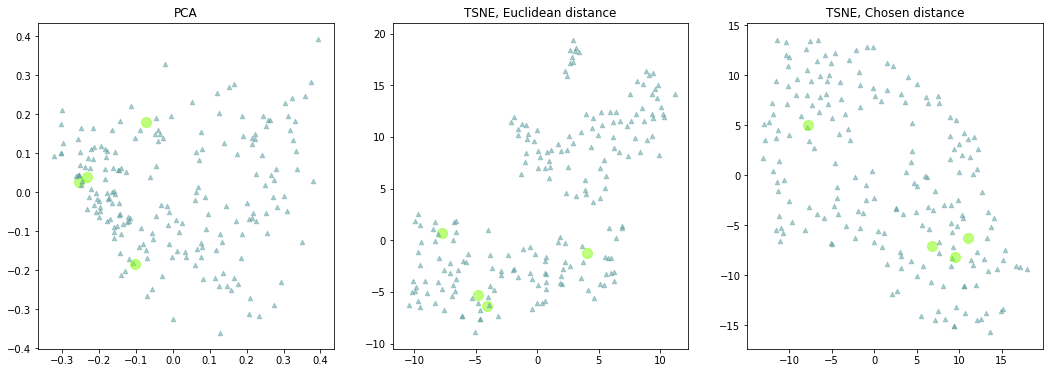

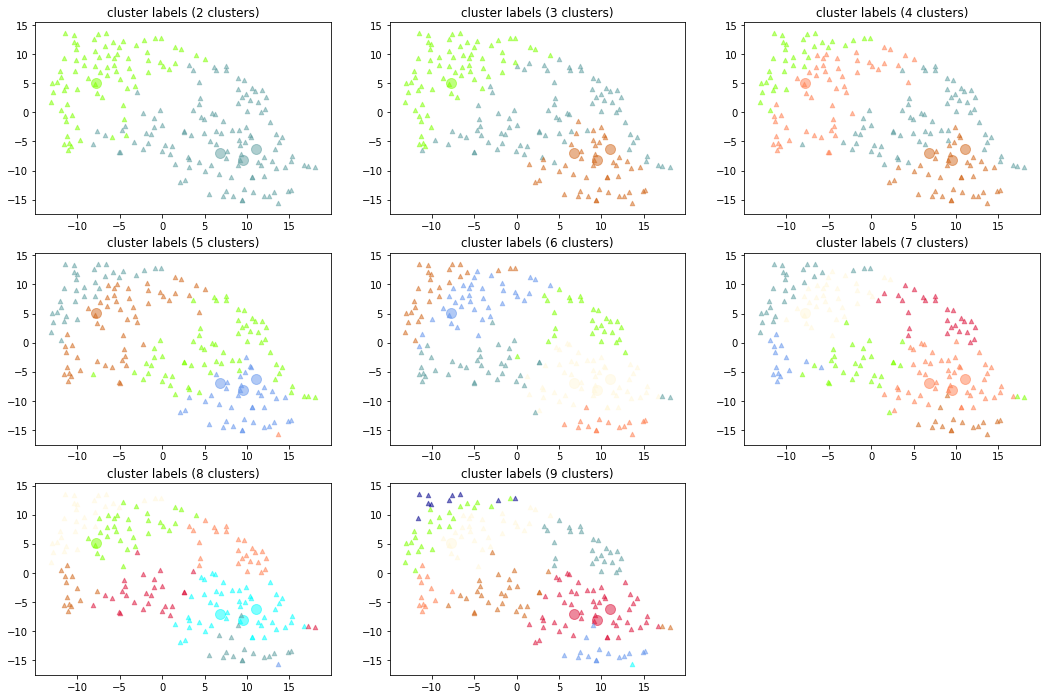

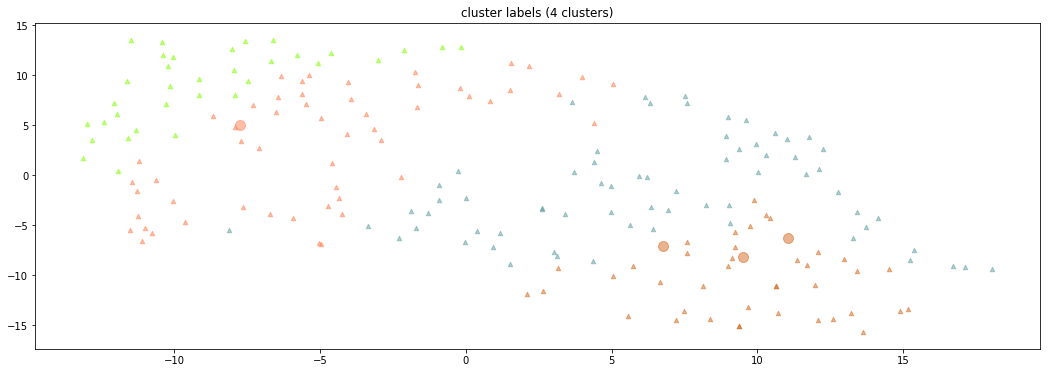

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_4
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,2
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,2
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,3
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,2


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
14,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
34,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
38,b' ',b'PWN ',b'',b'pwn',[],[],0,0
41,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0
44,b' ',b'bcu ',b'',b'hbl',[],[],0,0
56,b' ',b' ',b'',b'pwn',[],[],0,0
69,b' ',b'PWN ',b'',b'pwn',[],[],0,0
70,b' ',b'bcu ',b'',b'hbl',[],[],0,0
79,b'1FGL J1428.7+4239 ',b'bll ',b'',b'hbl',[],[],0,0


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
13,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
21,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
28,b' ',b'bll ',b'',b'hbl',[],[],0,0
31,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
40,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',[],[],0,0
47,b' ',b'PSR ',b'',b'pwn',[],[],0,0
48,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',[],[],0,1


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b' ',b'snr ',b'',b'snr',[],[],0,0
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
22,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
23,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
26,b' ',b'PWN ',b'',b'pwn',[],[],0,0
27,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
30,b' ',b' ',b'',b'snr',"[""b'HD 43582'""]",['B0Ve'],1,0
35,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
36,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
45,b' ',b'bll ',b'',b'hbl',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.107237,0.217000,0.206917,0.166192,0.228761,0.0,0.036266,0.013907,0.009132,0.008144,0.006446
1,0.108508,0.111366,0.099722,0.095359,0.110503,0.0,0.157981,0.112007,0.087283,0.061297,0.055974
2,0.059742,0.248178,0.231760,0.134355,0.292832,0.0,0.004475,0.002218,0.001555,0.002373,0.022511
3,0.096996,0.134892,0.147489,0.117020,0.143029,0.0,0.150232,0.066726,0.042968,0.032724,0.067924


In [28]:
spectra_2D  = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

[0.25, 0.17, 0.11, 0.07, 0.05, 0.03, 0.02, 0.01]


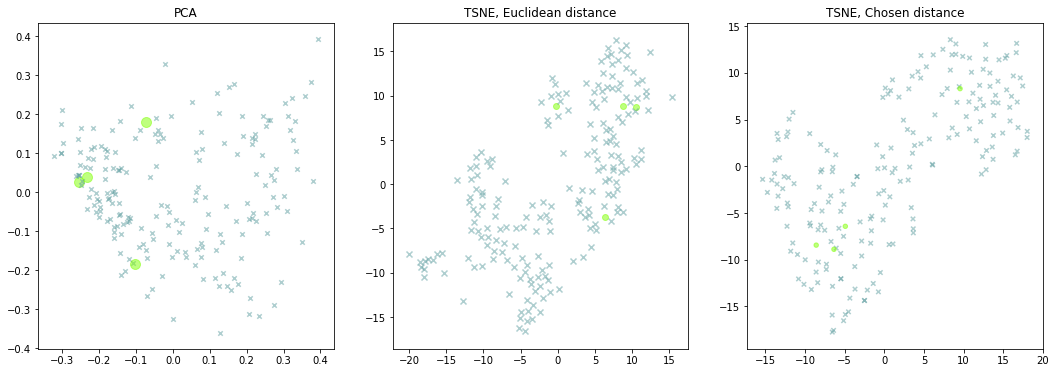

Clustering


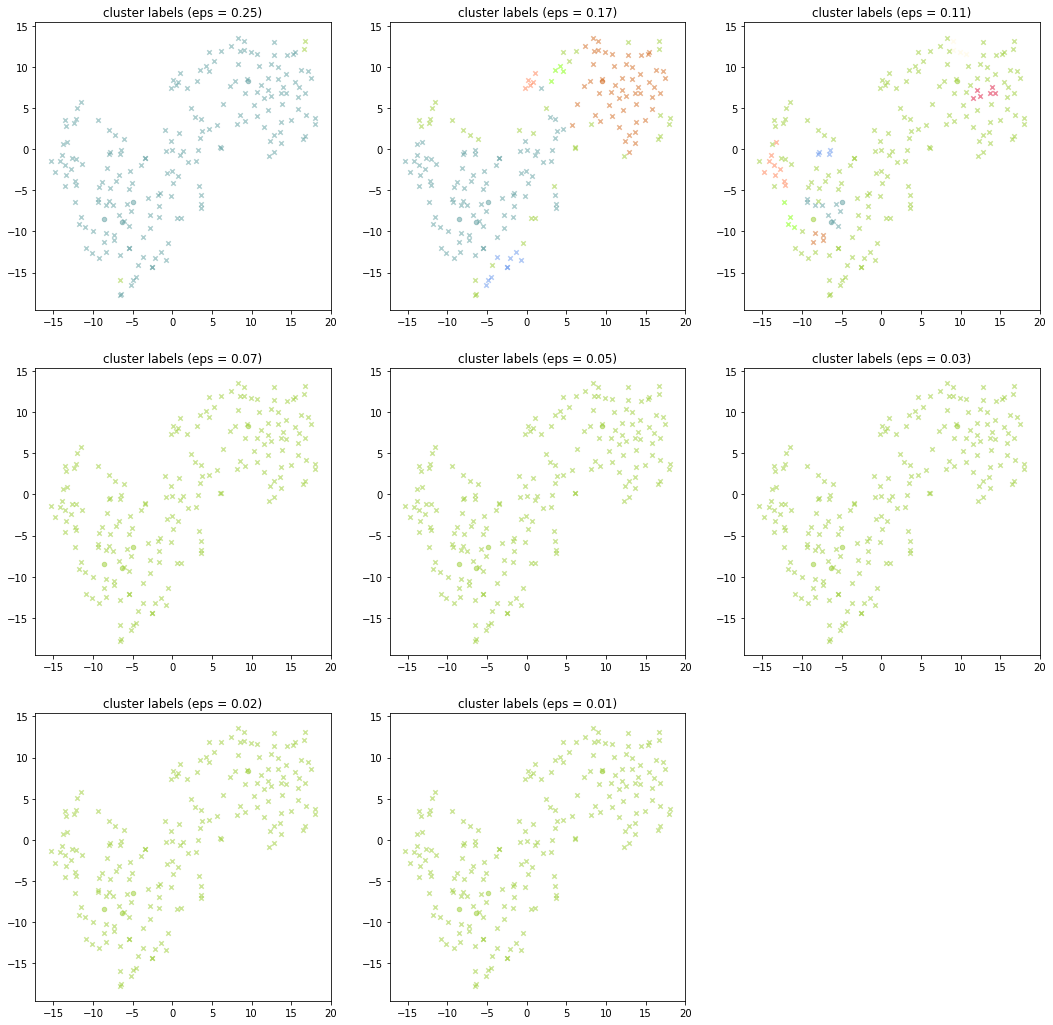

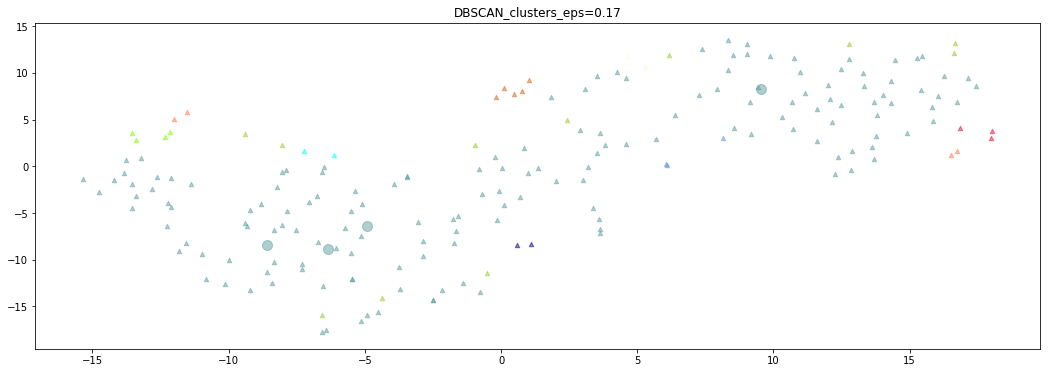

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.17
13,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
48,0.006600,0.228828,0.313885,0.090159,0.360529,0.0,0.000000,0.000000,0.000000,0.000000,...,[],0,b'1FGL J1018.6-5856 ',b'HMB ',b'',b'pwn',284.079346,-1.879876,1,0
152,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,0
188,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (#5F9EA0)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b'1FGL J0007.0+7303 ',b'PSR ',b'',"b'pwn,snr'",[],[],0,0
1,b' ',b'bll ',b'',b'hbl',[],[],0,0
2,b' ',b'snr ',b'',b'snr',[],[],0,0
3,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
5,b'1FGL J0047.3-2512 ',b'sbg ',b'',b'galaxy',[],[],0,0
6,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
7,b' ',b'bll ',b'',b'hbl',[],[],0,0
8,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
9,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0


1 cluster (#7FFF00)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
10,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
11,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
14,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
181,b'1FGL J2001.1+4351 ',b'bll ',b'',b'ibl',[],[],0,0


2 cluster (#D2691E)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
18,b' ',b'bll ',b'',b'hbl',[],[],0,0
23,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
46,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
57,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
90,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


3 cluster (#FF7F50)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
22,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
35,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
62,b'1FGL J1217.7+3007 ',b'bll ',b'',b'hbl',[],[],0,0
195,b'1FGL J2250.1+3825 ',b'bll ',b'',b'hbl',[],[],0,0


4 cluster (#6495ED)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
27,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
75,b'1FGL J1420.1-6048 ',b'PSR ',b'',b'pwn',[],[],0,0
77,b'1FGL J1420.1-6048 ',b'PSR ',b'',b'pwn',[],[],0,0


5 cluster (#FFF8DC)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
64,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
198,b'1FGL J2359.0-3035 ',b'bll ',b'',b'hbl',[],[],0,0


6 cluster (#DC143C)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
91,b'1FGL J1614.7-5138c',b'spp ',b'',b'unid',"[""b'MSX6C G331.5487-00.5364'"" ""b'MSX6C G331.54...",['Be' 'B'],1,0
100,b'1FGL J1640.8-4634c',b'spp ',b'',b'pwn',[],[],0,0
159,b' ',b' ',b'',b'pwn',[],[],0,0


7 cluster (#00FFFF)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
102,b'1FGL J1640.8-4634c',b'spp ',b'',b'unid',[],[],0,0
173,b'1FGL J1907.9+0602 ',b'PSR ',b'',b'unid',[],[],0,0


8 cluster (#00008B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
103,b' ',b'spp ',b'',b'unid',[],[],0,0
143,b' ',b' ',b'',b'unid',[],[],0,0


9 cluster (#008B8B)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
12,b' ',b'bll ',b'',b'hbl',[],[],0,0
15,b' ',b'rdg ',b'',b'hbl',[],[],0,0
34,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
41,b'1FGL J0854.0-4632 ',b'SNR ',"b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...",b'snr',[],[],0,0
81,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',[],[],0,0
86,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0
109,b'1FGL J1717.9-3729c',b'snr ',b'',"b'snr,mc'",[],[],0,0
117,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
132,b' ',b' ',b'',b'pwn',[],[],0,0
136,b'1FGL J1800.5-2359c',b' ',b'',"b'snr,mc'",[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.090227,0.187843,0.187812,0.132037,0.210081,0.0,0.078195,0.041834,0.029360,0.020506,0.022104
1,0.203026,0.206596,0.158582,0.229700,0.187130,0.0,0.013142,0.001384,0.000340,0.000080,0.000022
2,0.169085,0.051186,0.011159,0.065171,0.039534,0.0,0.059296,0.024707,0.034945,0.113516,0.431401
3,0.161416,0.179780,0.185817,0.179278,0.161780,0.0,0.112531,0.016246,0.002633,0.000426,0.000092
4,0.016400,0.208180,0.302564,0.116644,0.224044,0.0,0.058549,0.029465,0.023577,0.016637,0.003940
5,0.055762,0.087856,0.115652,0.075743,0.084847,0.0,0.423710,0.099316,0.048256,0.007290,0.001569
6,0.136755,0.164083,0.001175,0.146230,0.075260,0.0,0.150213,0.151268,0.114213,0.047108,0.013695
7,0.131281,0.239665,0.127711,0.153604,0.263398,0.0,0.011859,0.022131,0.015453,0.020689,0.014209
8,0.031443,0.105016,0.458276,0.077973,0.289274,0.0,0.007518,0.009320,0.006203,0.008579,0.006397
9,0.079201,0.183131,0.088207,0.154865,0.139355,0.0,0.108985,0.062605,0.043997,0.032282,0.107372


In [29]:
eps_l = [0.01 * int(1.5**i) for i in range(8, 0, -1)]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=200, TSNE_n_iter=300, TSNE_learning_rate2=200)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)